# Exploratory Data Analysis

Notebook containing exploratory data analysis of various financial returns.

In [30]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

In [31]:
# data read in and adjustment
sp500_raw_data = pd.read_csv("./data/all_stocks_5yr.csv")
sp500_index_data = pd.read_csv("./data/sp500index.csv")
btc_data = pd.read_csv("./data/GDAX-USD.csv")

sp500_raw_data.index = sp500_raw_data["date"].astype('datetime64[ns]') # set index to dates
sp500_raw_data.drop(columns=['date'],inplace=True) # drop extra Date column

sp500_index_data.index = sp500_index_data["Date"].astype('datetime64[ns]')
sp500_index_data.drop(columns=['Date'],inplace=True)

btc_data.index = btc_data["Date"].astype('datetime64[ns]')
btc_data.drop(columns=['Date'],inplace=True)

In [43]:
sp500_index_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [44]:
sp500_raw_data.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [45]:
btc_data.head()

,Open,High,Low,Volume
Date,,,,
2018-05-10,9310.01,9386.32,9054.99,7178.456484
2018-05-09,9193.00,9370.00,8960.00,8709.548871
2018-05-08,9310.01,9463.13,9050.00,9578.256001
2018-05-07,1727.01,1765.10,1558.00,32982.939177
2018-05-06,9788.01,9880.00,9390.00,7704.905922


## Returns

Plotting the time series plot of the prices. Converting prices into returns and plotting their histogram.

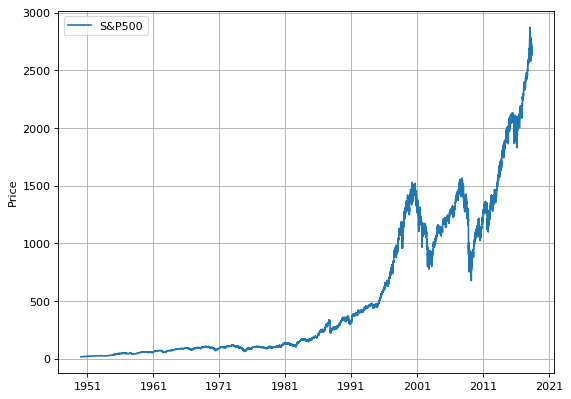

In [40]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(sp500_index_data.index, sp500_index_data['Close'])
plt.grid(True)
plt.ylabel('Price')
plt.legend(['S&P500']);

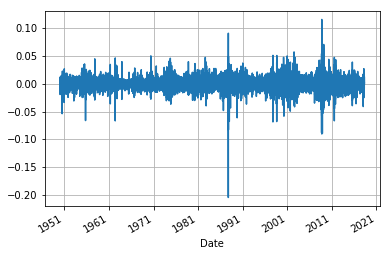

In [48]:
sp500_returns = sp500_index_data['Close'].pct_change()[1:]
sp500_returns.plot(grid=True)

## Kurtosis